Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a machine learning algorithm used for regression tasks. It belongs to the family of boosting algorithms and works by building an ensemble of decision trees, where each tree corrects the errors made by the previous ones. The model iteratively fits a new decision tree to the residual errors of the previous predictions, combining them to make accurate predictions. Gradient Boosting Regression is known for its high predictive accuracy and ability to capture complex relationships in data.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

Mean Squared Error: 0.0036573018807517176
R-squared: 0.9944991481897252


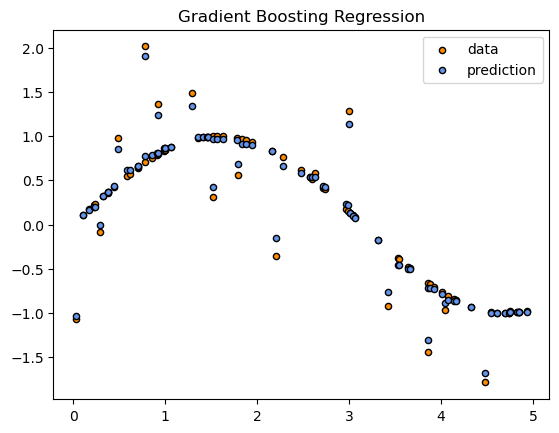

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Number of boosting iterations (trees)
n_iterations = 100
learning_rate = 0.1

# Initialize predictions with the mean of y
predictions = np.full_like(y, np.mean(y))

# Gradient Boosting iteration
for i in range(n_iterations):
    # Calculate the residuals (errors)
    residuals = y - predictions

    # Fit a decision tree to the residuals (as a weak learner)
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X, residuals)

    # Predictions from the current tree
    tree_preds = tree.predict(X)

    # Update predictions with a fraction of the tree's predictions
    predictions += learning_rate * tree_preds

# Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y, predictions)
r_squared = r2_score(y, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the original data and the final predictions
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(X, predictions, color="cornflowerblue", s=20, edgecolor="black", label="prediction")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (Test): 0.22925100731057424
R-squared (Test): 0.6785987772122426


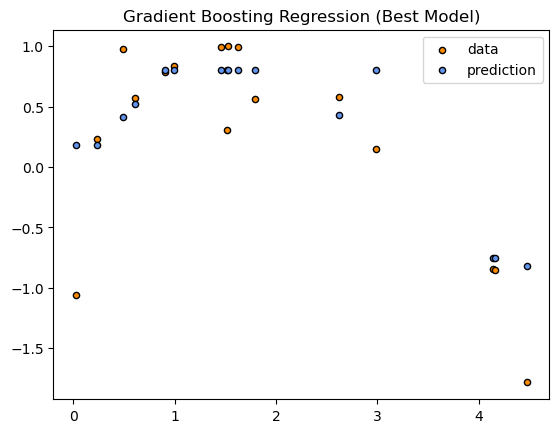

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their associated performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r_squared)

# Plot the original data and the final predictions
plt.figure()
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(X_test, y_pred, color="cornflowerblue", s=20, edgecolor="black", label="prediction")
plt.title("Gradient Boosting Regression (Best Model)")
plt.legend()
plt.show()


Q4. What is a weak learner in Gradient Boosting?

In Gradient Boosting, a weak learner is a simple and relatively low-complexity model, often referred to as a "base learner" or "base estimator." Weak learners are typically decision trees with shallow depths (e.g., 1 to 5 levels) or linear models. The key characteristic of a weak learner is that it performs slightly better than random guessing. Gradient Boosting combines multiple instances of these weak learners to create a strong, accurate model.

Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind Gradient Boosting is to sequentially correct the errors of previous models. It starts with a simple model (weak learner) and fits it to the data. In each subsequent step, a new model is trained to predict the residuals (the differences between the actual and predicted values) of the ensemble formed by the previously trained models. This process continues iteratively, with each new model focusing on the mistakes made by the previous ones. The final model is an ensemble of these weak learners, and it provides a powerful prediction by aggregating their contributions.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Gradient Boosting builds an ensemble of weak learners sequentially:

- Initialize predictions with a simple model (e.g., the mean of the target values).
- Calculate the residuals (errors) by subtracting the predictions from the actual target values.
- Fit a new weak learner (e.g., a decision tree) to predict these residuals.
- Update the predictions by adding a fraction (learning rate) of the new learner's predictions.
- Repeat steps 2-4 for a predefined number of iterations (number of trees).
- The final ensemble is the sum of predictions from all the weak learners.

This process improves the model's accuracy by iteratively correcting errors and focusing on difficult-to-predict instances.

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

To construct the mathematical intuition of the Gradient Boosting algorithm, you can break it down into the following steps:

- Start with an initial prediction, often the mean of the target values.
- Calculate the residuals (errors) by subtracting the initial prediction from the actual target values.
- Fit a weak learner (e.g., a decision tree) to predict these residuals. This weak learner should minimize the loss function for the residuals.
- Calculate the predicted values from the weak learner and multiply them by a learning rate (a small value typically < 1).
- Update the predictions by adding the weighted predictions from the weak learner to the previous predictions.
- Repeat steps 2-5 for a predefined number of iterations (number of trees) or until a stopping criterion is met.
- The final ensemble is the sum of predictions from all the weak learners.
- The key idea is that each new weak learner corrects the errors made by the previous ensemble of learners, gradually improving the overall model's accuracy.